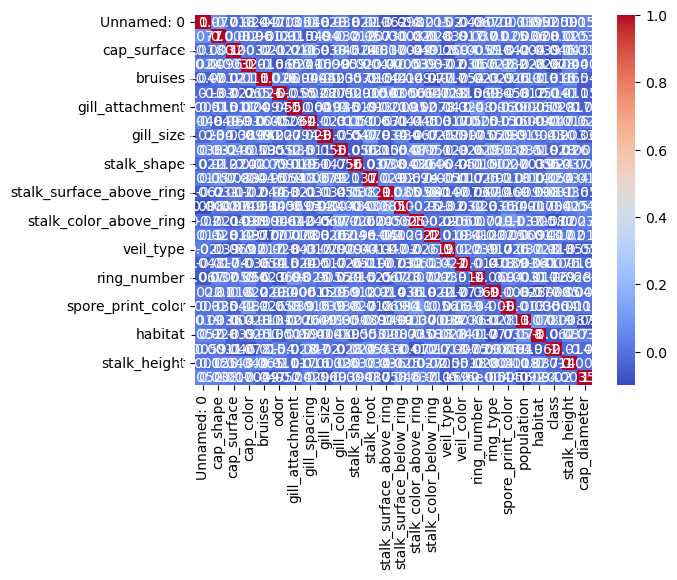

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Mushroom dataset
df = pd.read_csv(r"D:\Data since couress\SVM\SVM\mushroom.csv")

# Encode categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [2]:
# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   int32  
 2   cap_surface               2000 non-null   int32  
 3   cap_color                 2000 non-null   int32  
 4   bruises                   2000 non-null   int32  
 5   odor                      2000 non-null   int32  
 6   gill_attachment           2000 non-null   int32  
 7   gill_spacing              2000 non-null   int32  
 8   gill_size                 2000 non-null   int32  
 9   gill_color                2000 non-null   int32  
 10  stalk_shape               2000 non-null   int32  
 11  stalk_root                2000 non-null   int32  
 12  stalk_surface_above_ring  2000 non-null   int32  
 13  stalk_surface_below_ring  2000 non-null   int32  
 14  stalk_co

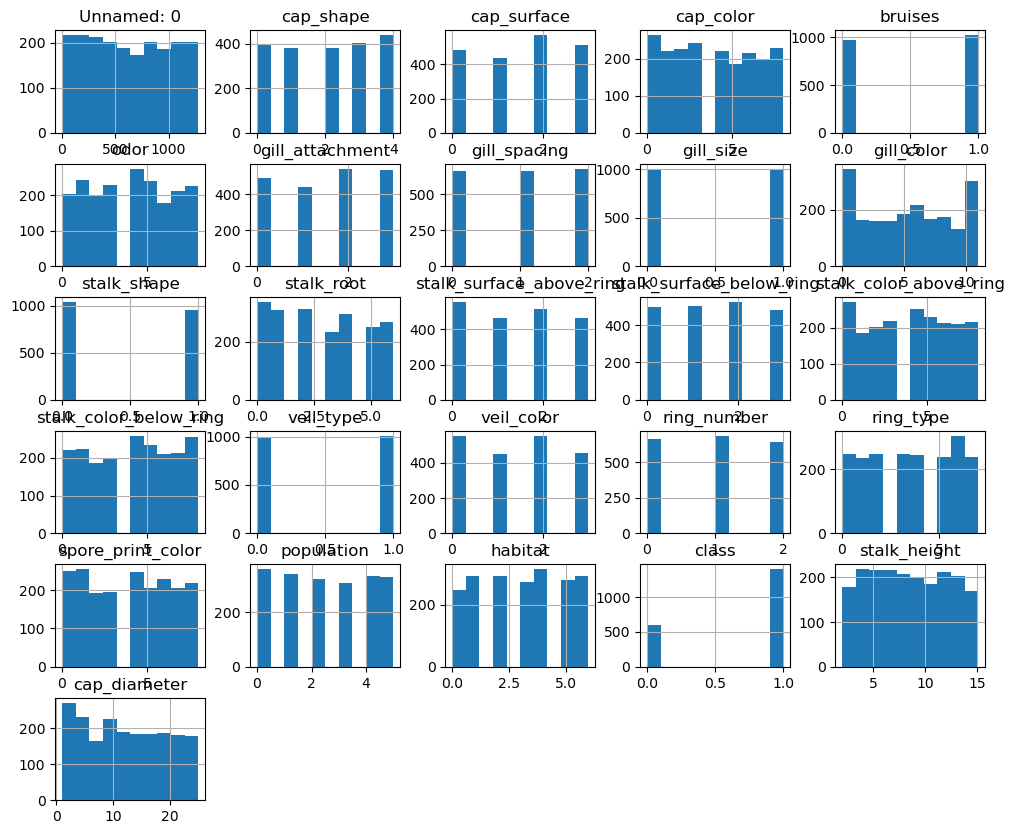

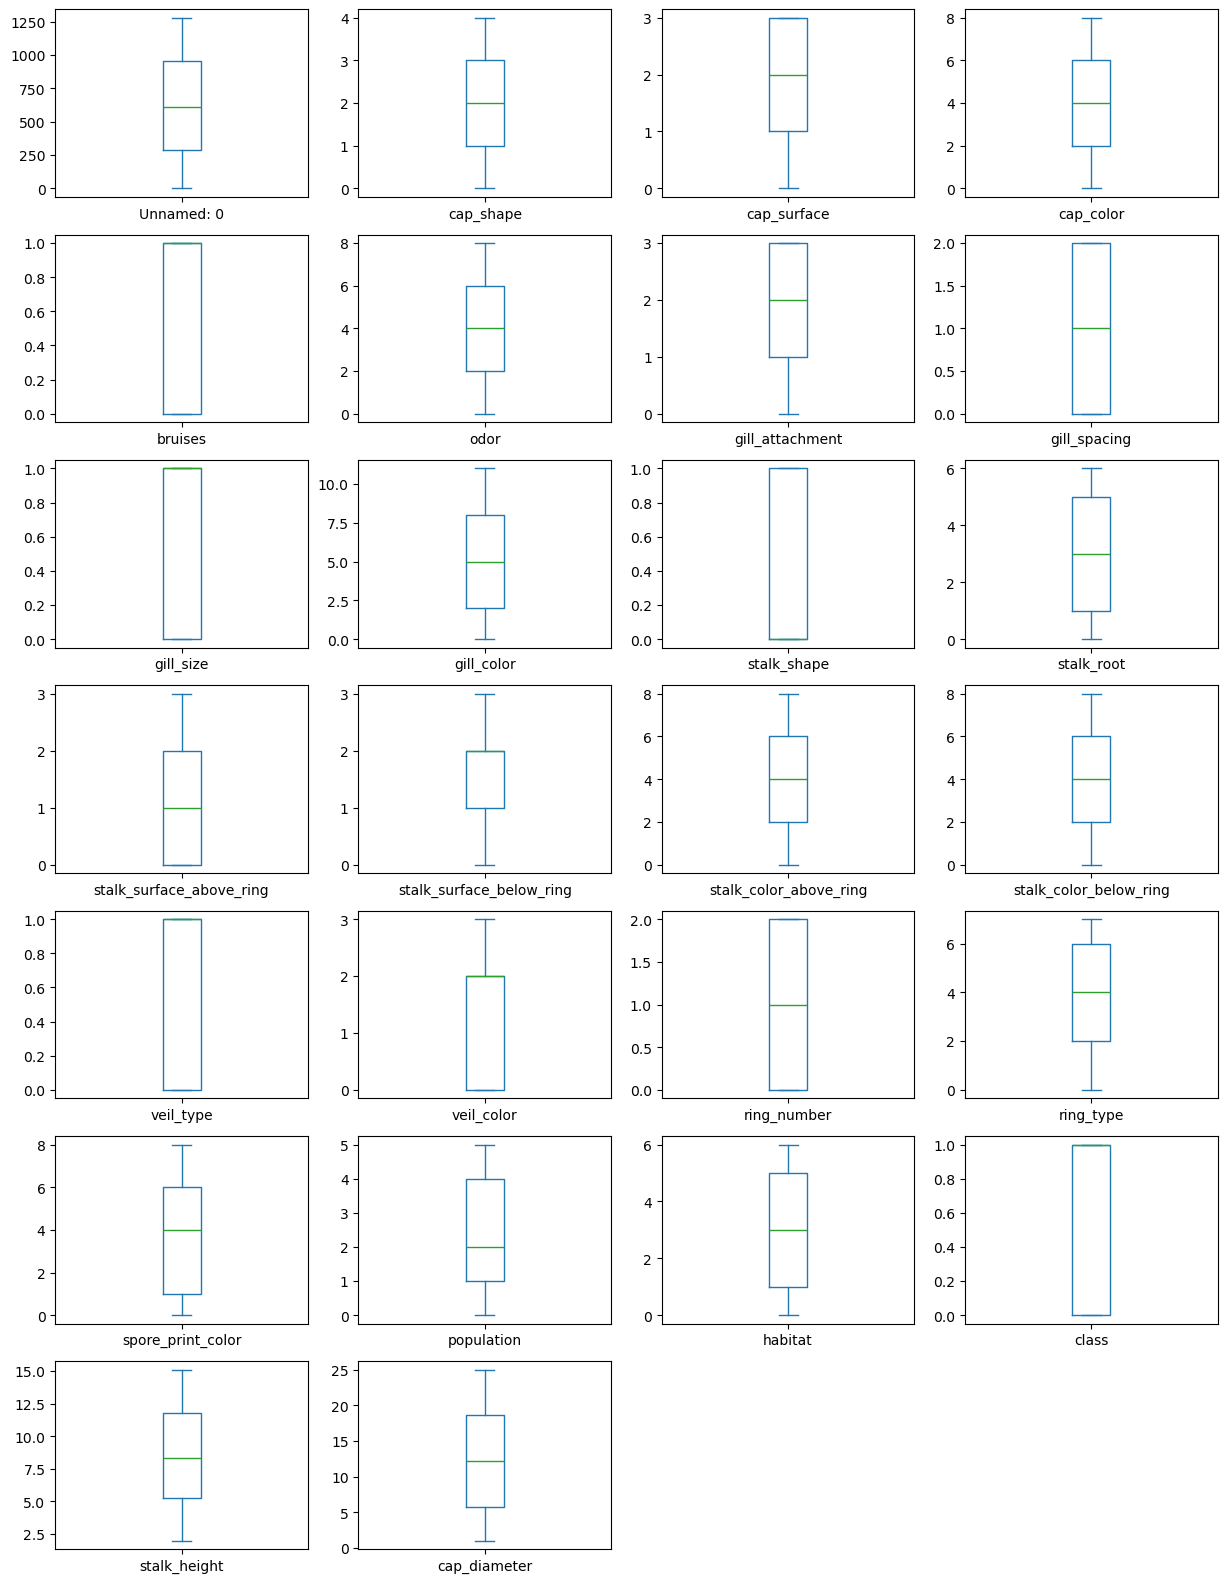

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 10))
plt.show()

# Box plots (adjust layout to fit all subplots)
df.plot(kind='box', subplots=True, layout=(7, 4), figsize=(15, 20))
plt.show()

# Density plots (adjust layout to fit all subplots)
df.plot(kind='density', subplots=True, layout=(7, 4), figsize=(15, 20))
plt.show()


In [ ]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Task 2: Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Task 3: Data Visualization
sns.pairplot(df, hue='class')
plt.show()


In [ ]:
sns.countplot(x='class', data=df)
plt.show()


In [ ]:
#Task 4: SVM Implementation
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


In [ ]:
#Task 5: Visualization of SVM Results
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize classification results on the testing data
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.show()



In [ ]:
#Task 6: Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print('Best parameters:', grid_search.best_params_)


In [ ]:
#Task 7: Comparison and Analysis
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f'Kernel: {kernel}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
